## Laboratorio: Análisis de Datos con Python

### Parte 1: Numpy:

### 1)	¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?


In [1]:
# Un array de 1000 elementos booleanos ocupa 1000 bytes

### 2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [2]:
numeros_pares = [numero for numero in range(1, 101) if numero % 2 == 0]
numeros_pares.sort(reverse=True)
print(numeros_pares[-10:])


[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]


### 3)	Dado el array

2 4 5 6
0 3 7 4
8 8 5 2
1 5 6 1

Seleccione con una instrucción el subarray de elementos

0 3 7 4

Después, seleccione el subarray de elementos

2 5
8 5


In [4]:
import numpy as np
A = np.array([
    [2, 4, 5, 6],
    [0, 3, 7, 4],
    [8, 8, 5, 2],
    [1, 5, 6, 0]
])
subarray1 = A[1, :]
subarray2 = np.array([A[2, 3], A[2, 2], A[2, 0], A[2, 2]])
print("Subarray 01:", subarray1)
print("Subarray 02:", subarray2)

Subarray 01: [0 3 7 4]
Subarray 02: [2 5 8 5]


In [5]:
a = [1, 4, 2, 7]
b = [1, 3, 2, 9]

diferencia = [ai - bi for ai, bi in zip(a, b)]

media_aritmetica = sum(diferencia) / len(diferencia)

print("La media aritmética de la diferencia (a-b) es:", media_aritmetica)


La media aritmética de la diferencia (a-b) es: -0.25


### 5)	Tengo valores de cordenadas (x, y) en las columnas del array

1.33 4.5
30.0 10.7
 
70.2 0.5

Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.


In [6]:
coordenadas = np.array([
    [1.33, 4.5],
    [30.0, 10.7],
    [70.2, 0.5]
])

nuevas_coordenadas = np.array([[37.1, -3.6]])
nuevo_array = np.vstack((coordenadas, nuevas_coordenadas))
print("Las dimensiones del nuevo array son:", nuevo_array.shape)


Las dimensiones del nuevo array son: (4, 2)


### 6)	Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [7]:
coordenadas = np.array([
    [1.33, 4.5],
    [30.0, 10.7],
    [70.2, 0.5],
    [37.1, -3.6]
])

coordenadas_transpuestas = coordenadas.T
nuevas_coordenadas = np.array([[10.8, 3.0], [35.8, 12.0]])
coordenadas_actualizadas = np.hstack((coordenadas_transpuestas, nuevas_coordenadas.T))
print("Array actualizado:\n", coordenadas_actualizadas)


Array actualizado:
 [[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


### Parte 2: Exploración y Minería de Datos:

### 1)	¿Cuántos Municipios tienen más de 100000 habitantes?.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NucleosPoblacion.csv')
print(df.head())

In [48]:
municipios_mas_100k = df[df['Poblacion'] > 100000]
cantidad_municipios_mas_100k = municipios_mas_100k.shape[0]
print(f"Existen {cantidad_municipios_mas_100k} municipios con más de 100,000 habitantes.")


Existen 62 municipios con más de 100,000 habitantes.


### 2)	Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayor y responda:

a.	¿Cuál es la segunda ciudad más poblada?
b.	¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?


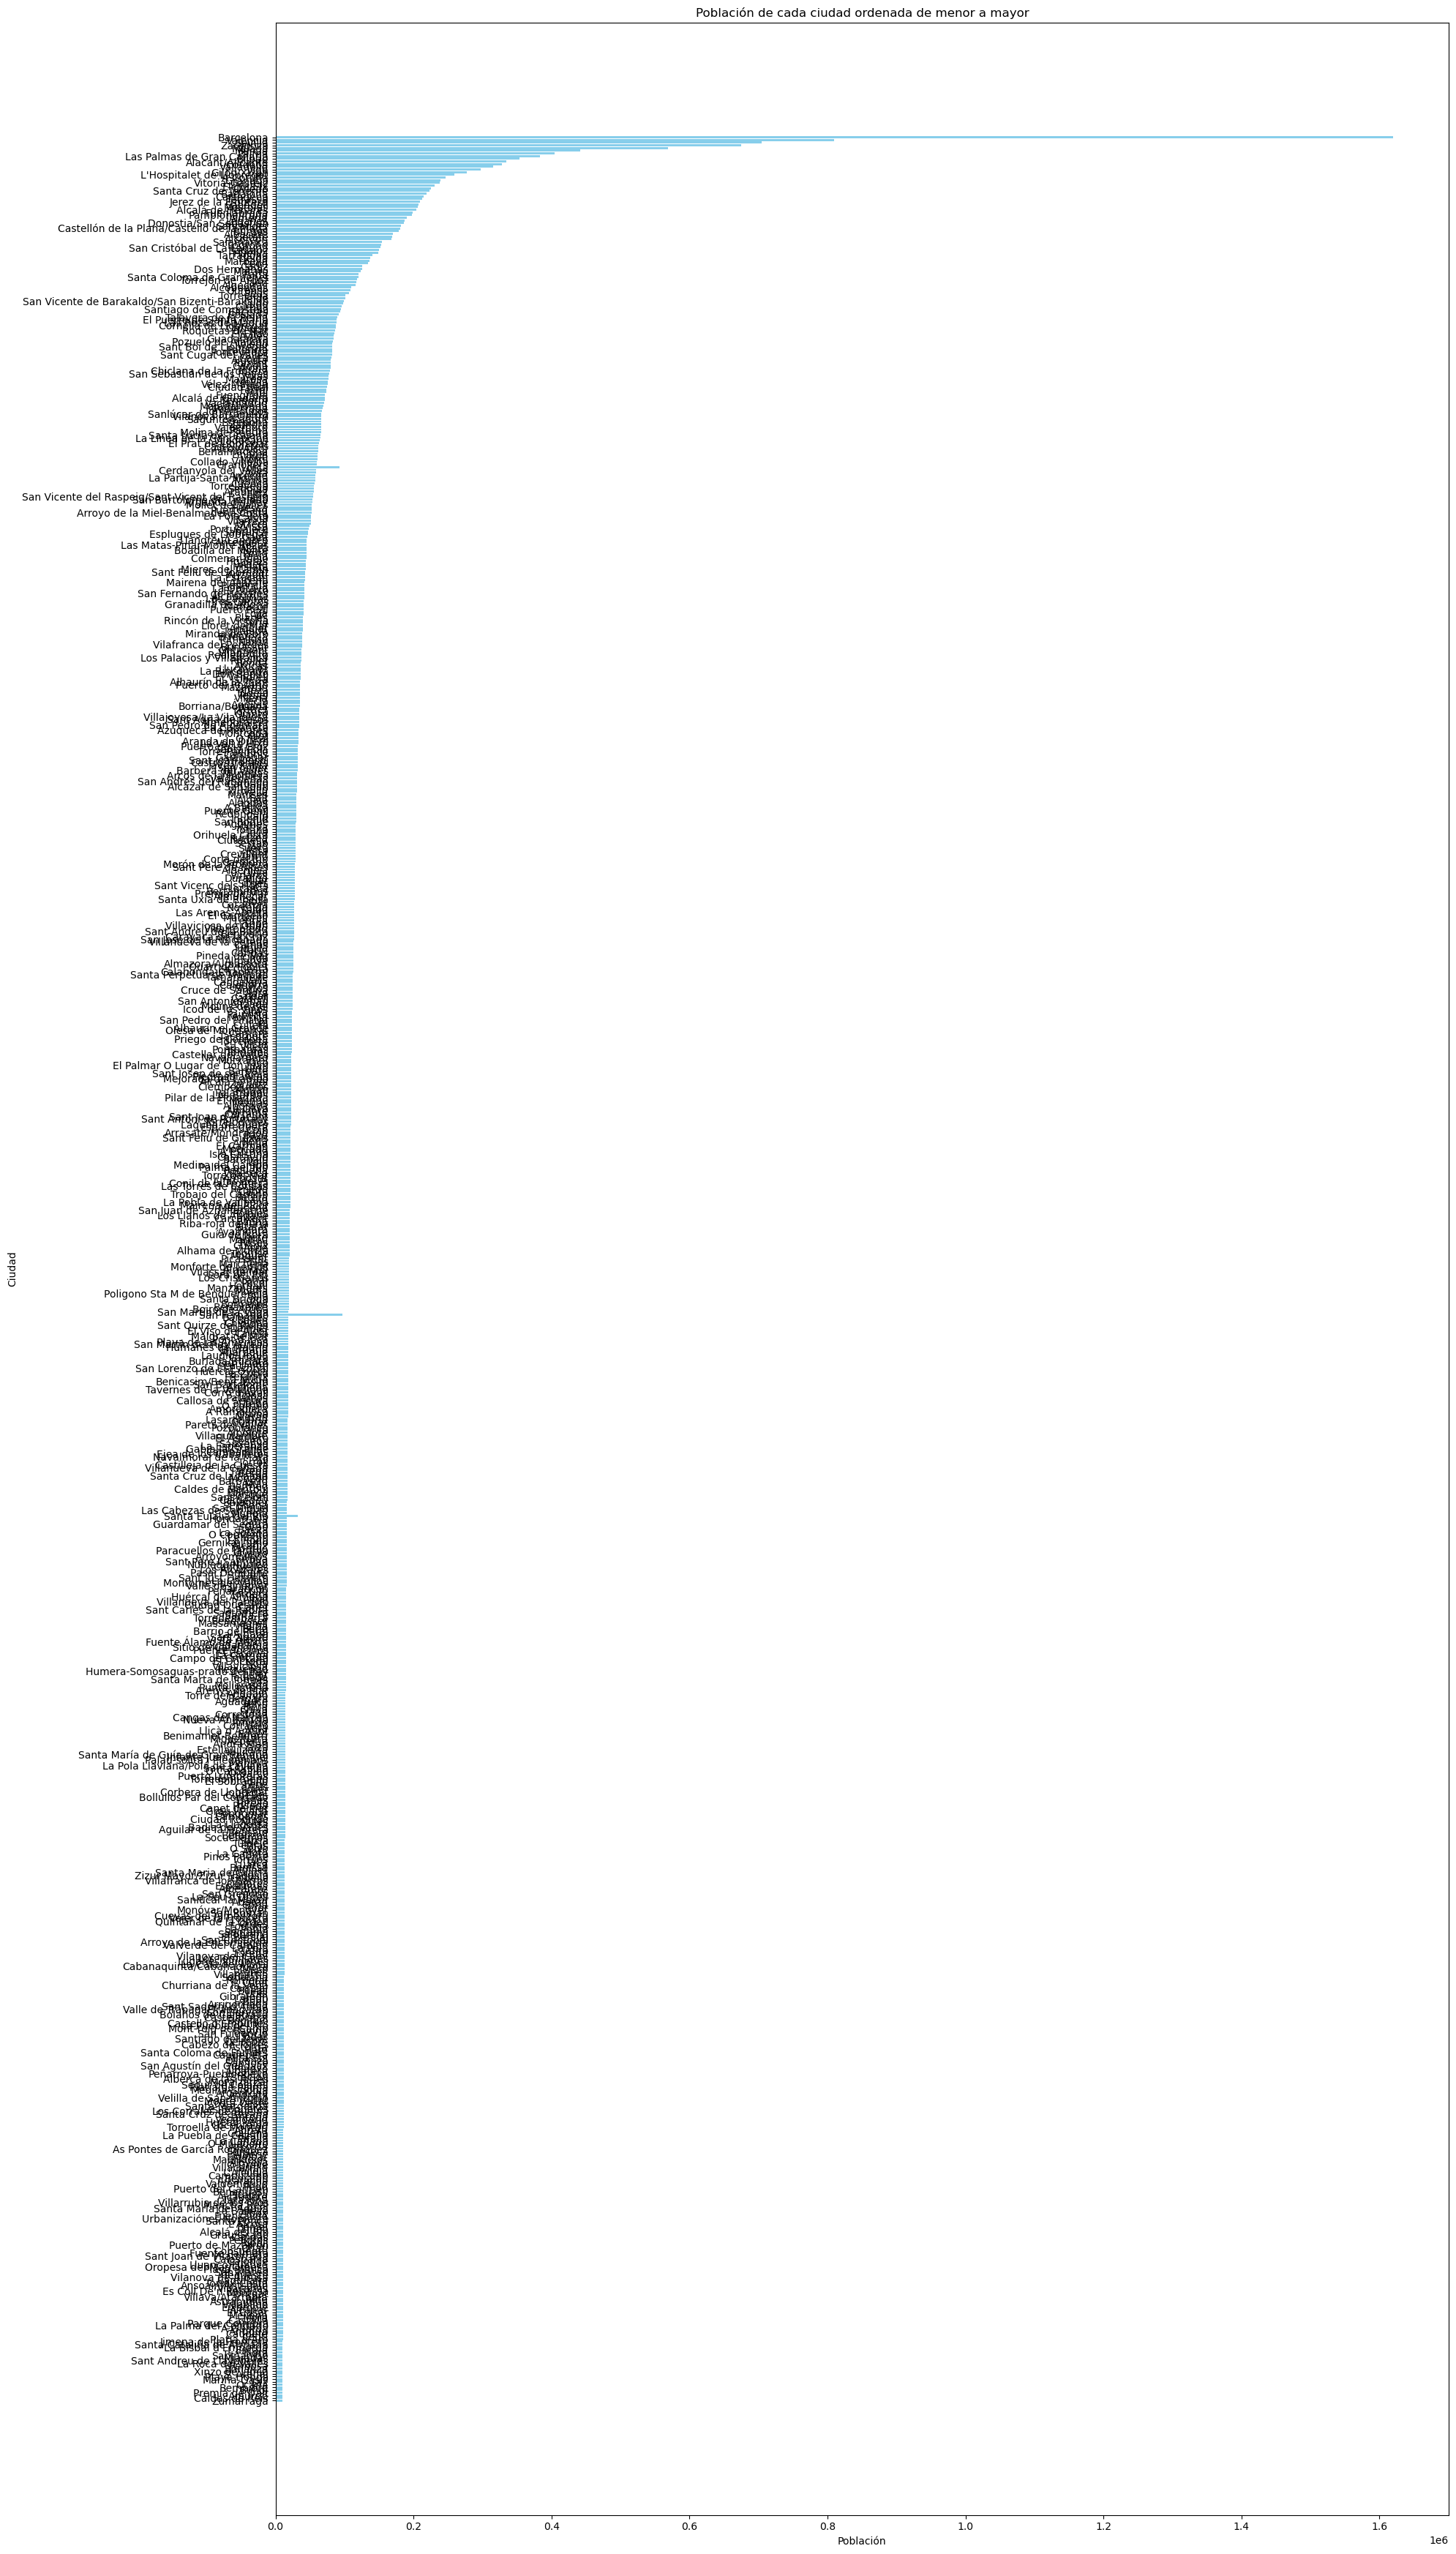

La segunda ciudad más poblada es Valencia.
La posición de Granada en el ranking de las ciudades más pobladas es 273.


In [34]:
df_ordenado = df.sort_values('Poblacion', ascending=True)

plt.figure(figsize=(20, 35))
plt.barh(df_ordenado['Texto'], df_ordenado['Poblacion'], color='skyblue')
plt.xlabel('Población')
plt.ylabel('Ciudad')
plt.title('Población de cada ciudad ordenada de menor a mayor')
plt.tight_layout()  
plt.show()

segunda_ciudad = df_ordenado['Texto'].iloc[-2] 
posicion_granada = df_ordenado[df_ordenado['Texto'] == 'Granada'].index[0] + 1

print(f"La segunda ciudad más poblada es {segunda_ciudad}.")
if not df_ordenado[df_ordenado['Texto'] == 'Granada'].empty:
    print(f"La posición de Granada en el ranking de las ciudades más pobladas es {posicion_granada}.")
else:
    print("Granada no se encuentra en el dataset.")


### 3)	¿Cuántos municipios de Navarra tienen más de 5000 habitantes?.

In [13]:
municipios_navarra = df[df['Provincia'] == 'Navarra']
municipios_navarra_5000 = municipios_navarra[municipios_navarra['Poblacion'] > 5000]
cantidad_municipios_navarra_5000 = municipios_navarra_5000.shape[0]
print(f"Hay {cantidad_municipios_navarra_5000} municipios en Navarra con más de 5000 habitantes.")


Hay 11 municipios en Navarra con más de 5000 habitantes.


### 4)	¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [14]:
indice_norte = df['Y'].idxmax()
municipio_norte = df.loc[indice_norte]
nombre = municipio_norte['Texto']
provincia = municipio_norte['Provincia']
poblacion = municipio_norte['Poblacion']
print(f"El municipio situado más al norte es {nombre}, perteneciente a la provincia de {provincia}, con una población de {poblacion} habitantes.")

El municipio situado más al norte es Viveiro, perteneciente a la provincia de Lugo, con una población de 16211.0 habitantes.


### 5)	Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [17]:
municipios_granada = df[df['Provincia'] == 'Granada']

media_poblacion = municipios_granada['Poblacion'].mean()
mediana_poblacion = municipios_granada['Poblacion'].median()
desviacion_std_poblacion = municipios_granada['Poblacion'].std()
max_poblacion = municipios_granada['Poblacion'].max()
min_poblacion = municipios_granada['Poblacion'].min()

print(f"Media de población: {media_poblacion}")
print(f"Mediana de población: {mediana_poblacion}")
print(f"Desviación estándar de la población: {desviacion_std_poblacion}")
print(f"Valor máximo de población: {max_poblacion}")
print(f"Valor mínimo de población: {min_poblacion}")

Media de población: 30217.85
Mediana de población: 17526.0
Desviación estándar de la población: 50355.49171459277
Valor máximo de población: 239154.0
Valor mínimo de población: 10386.0


### 6)	Realice un histograma con la población de los Municipios para cada una de las provincias.

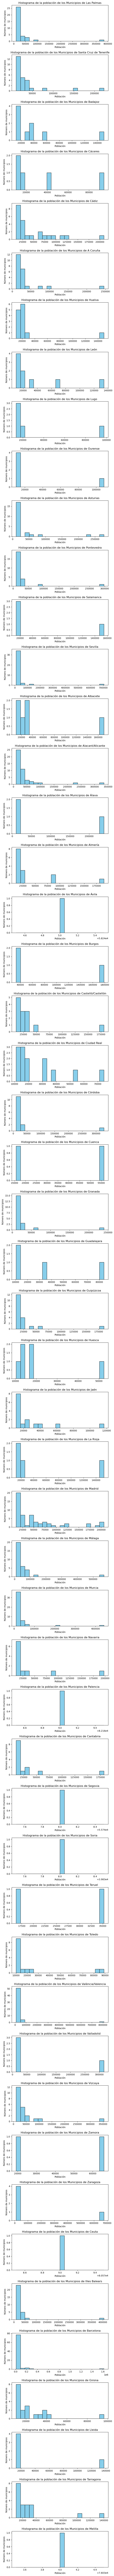

In [39]:
provincias_unicas = df['Provincia'].unique()

fig, axs = plt.subplots(len(provincias_unicas), figsize=(7, 3 * len(provincias_unicas)))

if len(provincias_unicas) == 1:
    axs = [axs]
for ax, provincia in zip(axs, provincias_unicas):
    municipios_provincia = df[df['Provincia'] == provincia]
    ax.hist(municipios_provincia['Poblacion'], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histograma de la población de los Municipios de {provincia}')
    ax.set_xlabel('Población')
    ax.set_ylabel('Número de municipios')

plt.tight_layout()
plt.show()


### 7)	Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [19]:
municipios_aleatorios = df.sample(n=50, replace=False)
promedio_poblacion = municipios_aleatorios['Poblacion'].mean()
desviacion_std_poblacion = municipios_aleatorios['Poblacion'].std()

print(f"El promedio de la población de los 50 municipios seleccionados es: {promedio_poblacion}")
print(f"La desviación estándar de la población de los 50 municipios seleccionados es: {desviacion_std_poblacion}")


El promedio de la población de los 50 municipios seleccionados es: 40510.94
La desviación estándar de la población de los 50 municipios seleccionados es: 57914.898736064206


### 8)	Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [20]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  
    return c * r

lat_madrid, lon_madrid = 40.4165, -3.7026

df = df[df['Texto'] != 'Madrid']

df['Distancia_Madrid'] = df.apply(lambda row: haversine(lon_madrid, lat_madrid, row['X'], row['Y']), axis=1)

municipio_mas_cercano = df.loc[df['Distancia_Madrid'].idxmin()]
municipio_mas_lejano = df.loc[df['Distancia_Madrid'].idxmax()]

print(f"El municipio más cercano a Madrid es {municipio_mas_cercano['Texto']} con una distancia de {municipio_mas_cercano['Distancia_Madrid']:.2f} km.")
print(f"El municipio más lejano a Madrid es {municipio_mas_lejano['Texto']} con una distancia de {municipio_mas_lejano['Distancia_Madrid']:.2f} km.")


El municipio más cercano a Madrid es Humera-Somosaguas-prado del Rey con una distancia de 7.01 km.
El municipio más lejano a Madrid es Los Llanos de Aridane con una distancia de 1840.29 km.
